<a href="https://colab.research.google.com/github/felirox/Arya-DS/blob/main/Arya_DS_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries, Dataset and Splitting them accordingly

In [34]:
# Importing all the necessary libraries

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import os

#Run this only if running via Google Colab, else, comment the next line
from google.colab import files

In [25]:
# Downloading the provided dataset

!gdown --id 12GAAr58y1bI1vTWknR4MXOxeXHtjZItl

# Unzipping the dataset and extracting the files

!unzip /content/Arya_DataScientist_Assignment.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=12GAAr58y1bI1vTWknR4MXOxeXHtjZItl
To: /content/Arya_DataScientist_Assignment.zip
100% 161k/161k [00:00<00:00, 8.58MB/s]
Archive:  /content/Arya_DataScientist_Assignment.zip
replace training_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: training_set.csv        
  inflating: test_set.csv            


In [26]:
# Using pandas to read the csv as a dataframe

train_set=pd.read_csv("training_set.csv")
test_set=pd.read_csv("test_set.csv")


In [27]:
# Shuffling the dataset

train_set=train_set.sample(frac=1).reset_index(drop=True)
test_set=test_set.sample(frac=1).reset_index(drop=True)

# Splitting the dataset to accomodate the said 4/5 ratio - Train and Validation

trainlength=len(train_set)
n_training_dataset=int(trainlength*4/5)
n_validation_dataset=trainlength-n_training_dataset
print("Total Rows: ",trainlength)
print("Training No: ",n_training_dataset)
print("Validation No: ",n_validation_dataset)
print("Testing No: ",len(test_set))


training_dataset=train_set[:n_training_dataset]
validation_dataset=train_set[n_training_dataset:]



Total Rows:  3910
Training No:  3128
Validation No:  782
Testing No:  691


In [28]:
# Splitting the X and Y datasets for Train and

X_train = training_dataset.iloc[:,1:58].astype(float)
Y_train = training_dataset.iloc[:,58]

X_valid = validation_dataset.iloc[:,1:58].astype(float)
Y_valid = validation_dataset.iloc[:,58]

X_test = test_set.iloc[:,1:58].astype(float)


In [29]:

# Standard scaling to standardize the dataset



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [30]:

def model_init():
    
  # 4 layer DNN
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(
      loss=tf.keras.losses.binary_crossentropy,
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
      metrics=[
          tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall')
      ]
  )
  return model 



In [32]:
no_of_epoch = 100


model = model_init()
# model.summary()
checkpoint_path = "/content/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

  # Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  save_weights_only=True,
                                                  verbose=1)
val_dataset = tf.data.Dataset.from_tensor_slices((X_valid_scaled, Y_valid))
val_dataset = val_dataset.batch(64)

history = model.fit(X_train_scaled, Y_train, epochs=no_of_epoch,validation_data=val_dataset,callbacks=[cp_callback])
model.save("my_model_save")
model.save("my_model_h5.h5")

Epoch 1/100
96/98 [============================>.] - ETA: 0s - loss: 0.6421 - accuracy: 0.6794 - precision: 0.5667 - recall: 0.8267
Epoch 1: saving model to /content/cp.ckpt
98/98 [==============================] - 4s 13ms/step - loss: 0.6397 - accuracy: 0.6822 - precision: 0.5690 - recall: 0.8237 - val_loss: 0.5358 - val_accuracy: 0.8159 - val_precision: 0.7741 - val_recall: 0.7158
Epoch 2/100
78/98 [======================>.......] - ETA: 0s - loss: 0.4820 - accuracy: 0.8474 - precision: 0.8862 - recall: 0.7004
Epoch 2: saving model to /content/cp.ckpt
98/98 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.8517 - precision: 0.8937 - recall: 0.7110 - val_loss: 0.4263 - val_accuracy: 0.8670 - val_precision: 0.8790 - val_recall: 0.7466
Epoch 3/100
84/98 [========================>.....] - ETA: 0s - loss: 0.3853 - accuracy: 0.8869 - precision: 0.9252 - recall: 0.7777
Epoch 3: saving model to /content/cp.ckpt
98/98 [==============================] - 0s 2ms/step - 

In [35]:
# Download the saved files

!zip -r /content/saved_model.zip /content/my_model_save

#These lines will not work if run outside Google Colab

files.download("/content/saved_model.zip")
files.download("/content/my_model_h5.h5")

updating: content/my_model_save/ (stored 0%)
updating: content/my_model_save/assets/ (stored 0%)
updating: content/my_model_save/variables/ (stored 0%)
updating: content/my_model_save/variables/variables.index (deflated 63%)
updating: content/my_model_save/variables/variables.data-00000-of-00001 (deflated 9%)
updating: content/my_model_save/keras_metadata.pb (deflated 86%)
updating: content/my_model_save/saved_model.pb (deflated 88%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

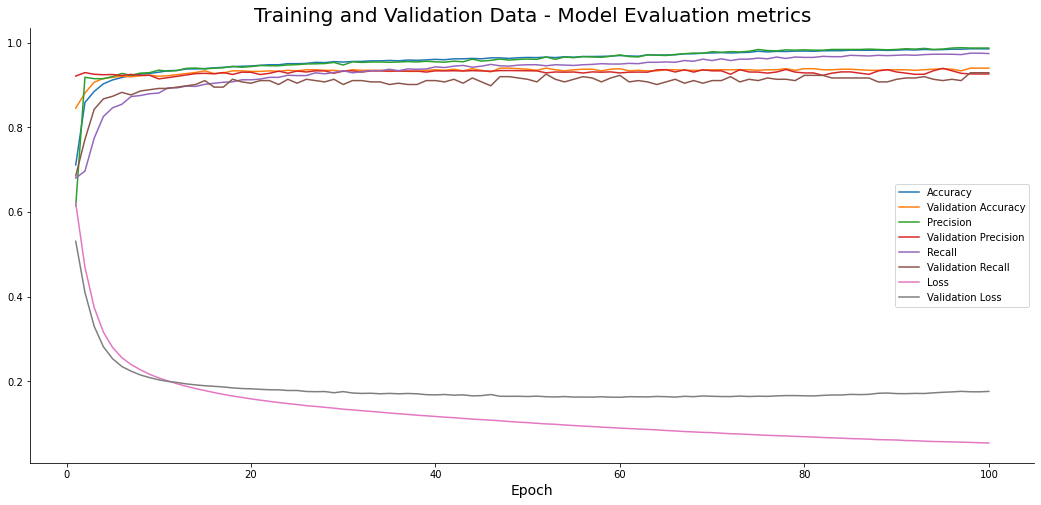

In [9]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


plt.plot(
    np.arange(1, no_of_epoch+1), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, no_of_epoch+1), 
    history.history['val_accuracy'], label='Validation Accuracy'
)
plt.plot(
    np.arange(1, no_of_epoch+1), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, no_of_epoch+1), 
    history.history['val_precision'], label='Validation Precision'
)
plt.plot(
    np.arange(1, no_of_epoch+1), 
    history.history['recall'], label='Recall'
)
plt.plot(
    np.arange(1, no_of_epoch+1), 
    history.history['val_recall'], label='Validation Recall'
)
plt.plot(
    np.arange(1, no_of_epoch+1), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, no_of_epoch+1), 
    history.history['val_loss'], label='Validation Loss'
)
plt.title('Training and Validation Data - Model Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [23]:
#Predicting the output for the Test Dataset 
predictions = model.predict(X_test_scaled)

#Converting the Predicted Probabilites into Binary Class labels
# Threshold -> 0.7

predictions[predictions>=0.7]=1
predictions[predictions<0.7]=0

In [38]:
predictions = predictions.astype(int)
print(predictions[:5])

[[1]
 [0]
 [0]
 [1]
 [0]]


In [40]:
np.savetxt("op-binary.txt",predictions.astype(int), fmt='%i', delimiter=",")

#Load the model using the trained weights


In [12]:
# Loads the weights
checkpoint_path = "/content/cp.ckpt"

model.load_weights(checkpoint_path)

# # Re-evaluate the model
# loss, acc = model.evaluate(test_images, test_labels, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

predictions = model.predict(X_test_scaled)